In [0]:
from google.cloud import bigquery
from google.colab import auth
auth.authenticate_user()

In [4]:
!pip install arviz
import pymc3 as pm
import numpy as np
import pandas as pd

In [0]:
query = '''with 

top_cent_communes as (SELECT *
from (SELECT nom_commune, count(distinct id ) as n_id 
FROM <real_location_data >
group by 1 order by 2 DESC)
limit 100),

visites_urbaines as (
select rl.*, row_number() OVER (PARTITION by id) as row_n
from `<rl_location_data>`  rl
join top_cent_communes t on rl.nom_commune = t.nom_commune)

select
edge_distance, maxmind_distance, pulse_distance
from visites_urbaines
where row_n = 1
--and maxmind_latitude = 0'''

client = bigquery.Client(project=<project_id>)

query_job = client.query(query)

obs_df = query_job.to_dataframe()

In [17]:
obs_df.dtypes

edge_distance       float64
maxmind_distance    float64
pulse_distance      float64
dtype: object

In [18]:
geoloc_model = pm.Model()


with geoloc_model:
    
    maxmind = pm.Exponential(name='maxmind', lam=1/135, observed=obs_df.maxmind_distance)
    edge = pm.Exponential(name='edge', lam=1/135, observed=obs_df.edge_distance)
    
    delta_pulse = edge - maxmind
    
    trace = pm.sample(500)

ValueError: ignored

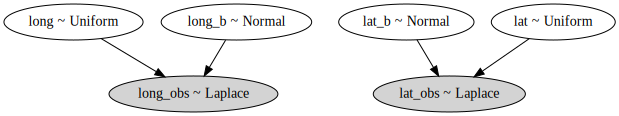

In [0]:
pm.model_to_graphviz(geoloc_model)

In [0]:
map_estimate = pm.find_MAP(model=geoloc_model)
map_estimate

/usr/local/lib/python3.6/dist-packages/pymc3/tuning/starting.py:61: UserWarning: find_MAP should not be used to initialize the NUTS sampler, simply call pymc3.sample() and it will automatically initialize NUTS in a better way.
  warnings.warn('find_MAP should not be used to initialize the NUTS sampler, simply call pymc3.sample() and it will automatically initialize NUTS in a better way.')
logp = -12.576, ||grad|| = 7.9518: 100%|██████████| 19/19 [00:00<00:00, 847.54it/s]  


{'b': array(-0.99235375),
 'lat': array(43.48366858),
 'lat_interval__': array(-1.10734144)}

In [0]:
obs_df.loc[obs_df.num_contact == contact, ['maxmind_latitude', 'maxmind_longitude']]

,maxmind_latitude,maxmind_longitude
546,50.5061,3.1104


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9ee766a048>,
      dtype=object)

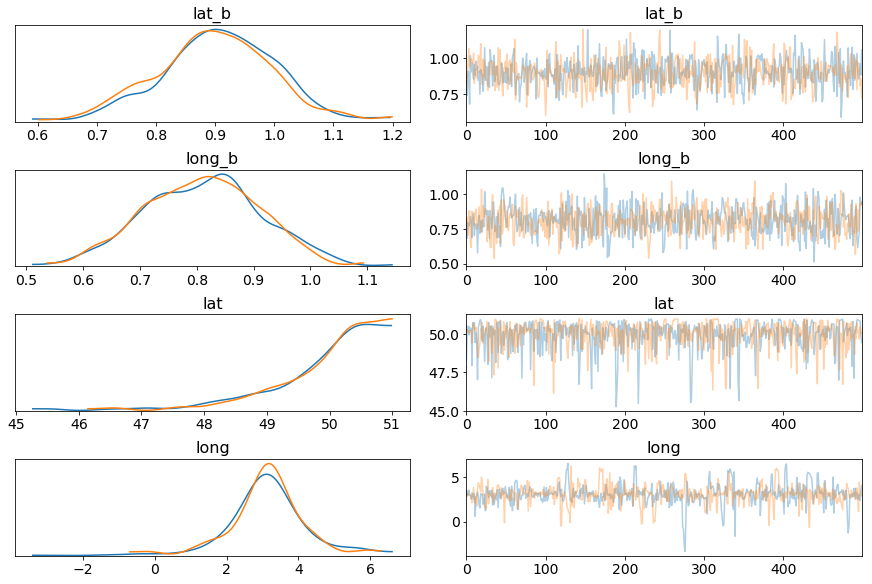

In [0]:
pm.traceplot(trace)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f58ec13ee80>,
      dtype=object)

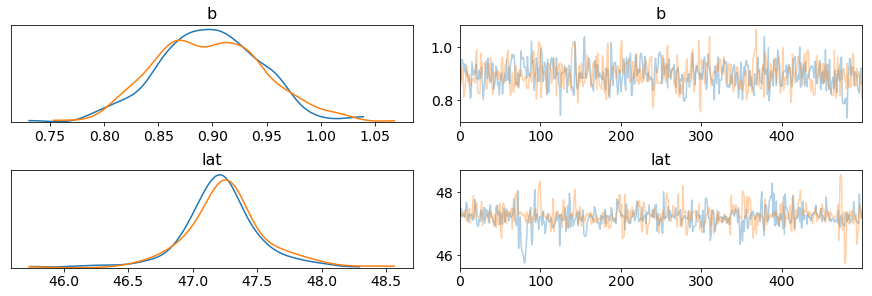

In [0]:
pm.traceplot(trace)

In [0]:
results = pd.DataFrame(data={'latitude':trace.lat, 
                             'longitude':trace.long})



,latitude,longitude
0,48.319080,3.001304
1,50.477279,3.492465
2,50.517821,2.967354
3,49.940448,3.565156
4,50.448147,3.067068
5,50.155306,2.969186
6,50.362652,2.558084
7,47.942294,3.239627
8,50.750477,3.043797
9,50.374328,2.574862
